In [68]:
#!/usr/bin/env python3

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
# sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/data')
# print(sys.path)

# Import the data
df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
print(df)

       Unnamed: 0      Gen    Price      Mismatch  Dividends  RDividend  \
0               0      0.0   104.58 -9.137023e+02   0.004066  -0.840945   
1               1      1.0   104.28  5.423463e+01   0.004061  -0.235647   
2               2      2.0   104.73 -5.304937e+02   0.004044  -0.670894   
3               3      3.0   103.72 -4.960709e+00   0.004070   1.025119   
4               4      4.0   104.33 -2.911478e+02   0.004082   0.450645   
...           ...      ...      ...           ...        ...        ...   
14974       14974  14974.0  1242.75 -9.033702e+06   0.006556  -0.491267   
14975       14975  14975.0  1242.75 -9.033848e+06   0.006554  -0.051226   
14976       14976  14976.0  1242.75 -9.033994e+06   0.006544  -0.235882   
14977       14977  14977.0  1242.75 -9.034141e+06   0.006483  -1.485215   
14978       14978  14978.0  1242.75 -9.034287e+06   0.006479  -0.105649   

              Volume  Rep       Pos+           Pos-  ...  MeanReturn  Spoils  \
0      100957.66510

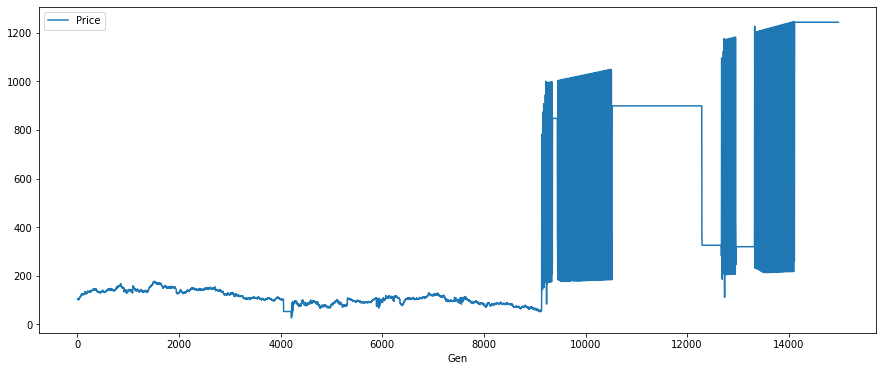

In [69]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

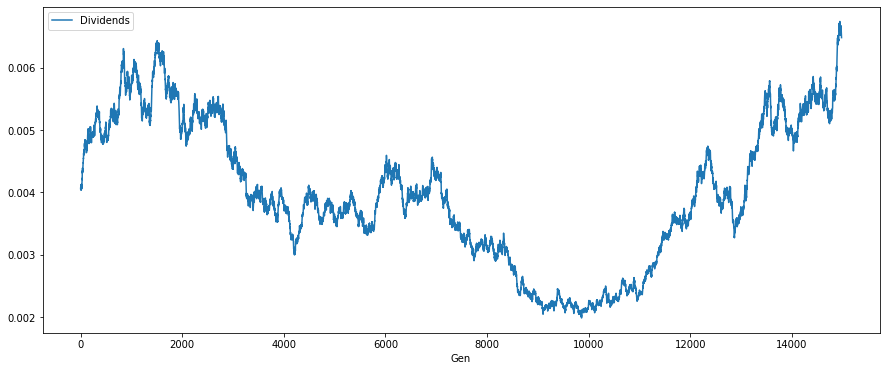

In [70]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()



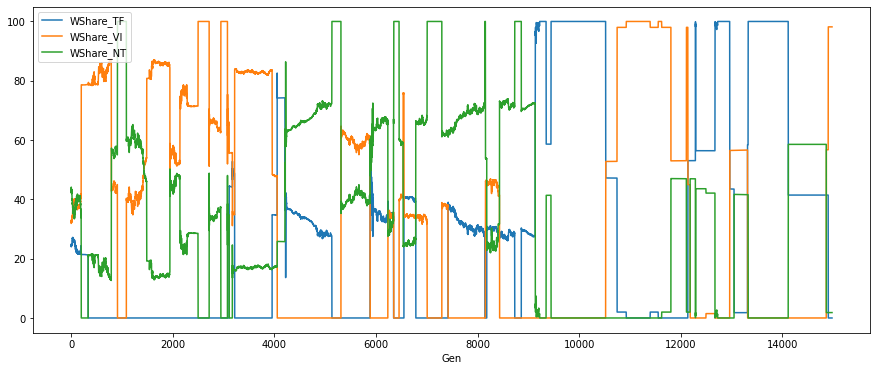

In [71]:
df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()



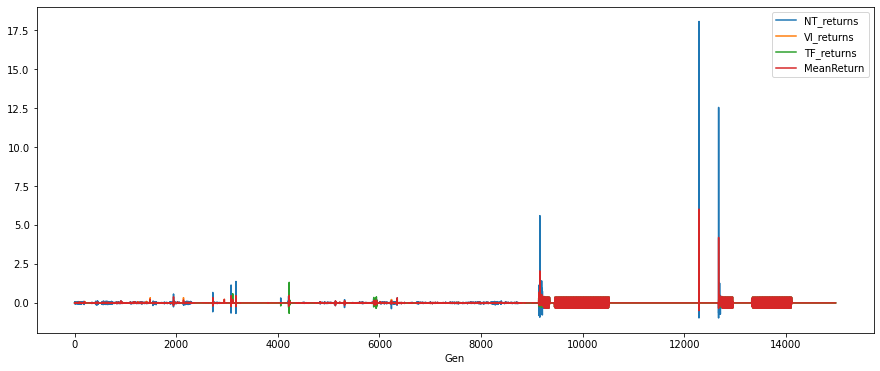

In [72]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns", 'MeanReturn'],
        kind="line", figsize=(15, 6))
plt.show()

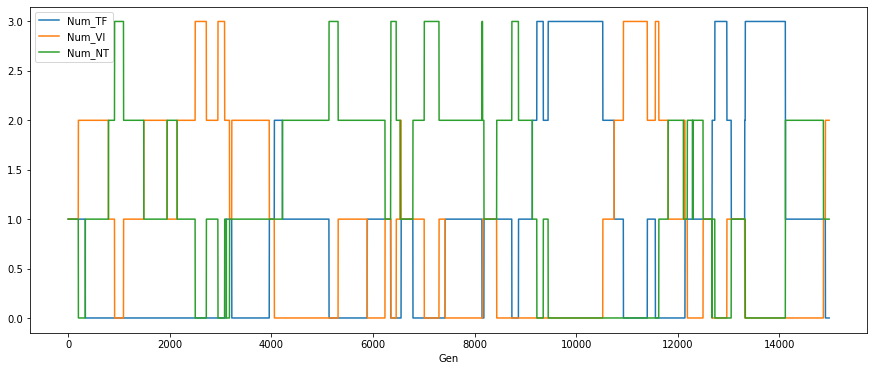

In [73]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.show()

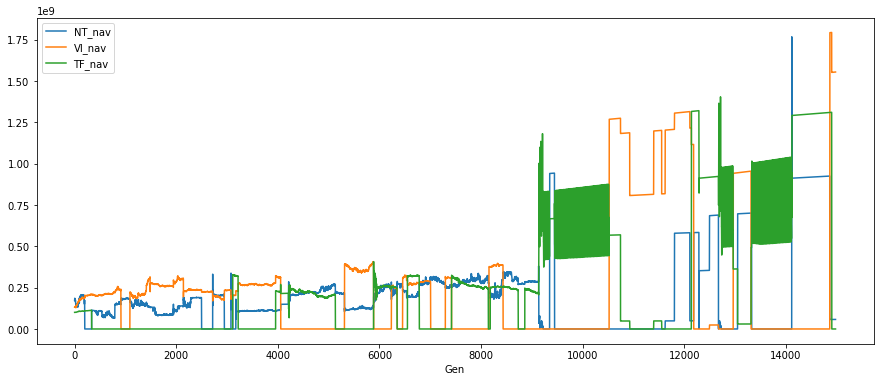

In [74]:
''' NAV '''
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


0.003002569987409816


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 2.8931064620794] is not finite

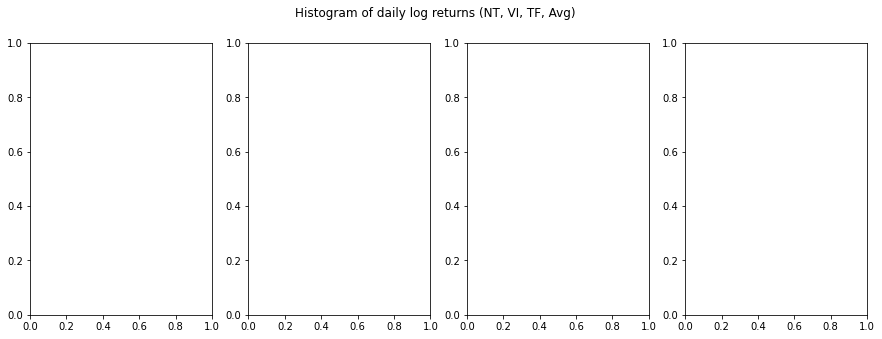

In [75]:
''' Histogram of the daily strategy returns '''

print(np.mean(df['MeanReturn'])) # Daily







fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of daily log returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_returns']), bins = 20)
ax2.hist(np.log(df['VI_returns']), bins = 20)
ax3.hist(np.log(df['TF_returns']), bins = 20)
ax4.hist(np.log(df['MeanReturn']), bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Ln Returns')
plt.show()

# TODO: add monthly returns





inf


/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_32752/393957571.py:9: RuntimeWarning: invalid value encountered in double_scalars
  NT_monthly_returns.append(NT_daily_wealth[i] / NT_daily_wealth[i-21])
/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_32752/393957571.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  NT_monthly_returns.append(NT_daily_wealth[i] / NT_daily_wealth[i-21])
/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_32752/393957571.py:19: RuntimeWarning: invalid value encountered in double_scalars
  VI_monthly_returns.append(VI_daily_wealth[i] / VI_daily_wealth[i-21])
/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_32752/393957571.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  VI_monthly_returns.append(VI_daily_wealth[i] / VI_daily_wealth[i-21])
/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_32752/393957571.py:29: RuntimeWarning: invalid value encountered in double_scalars
  

ValueError: supplied range of [0.0, inf] is not finite

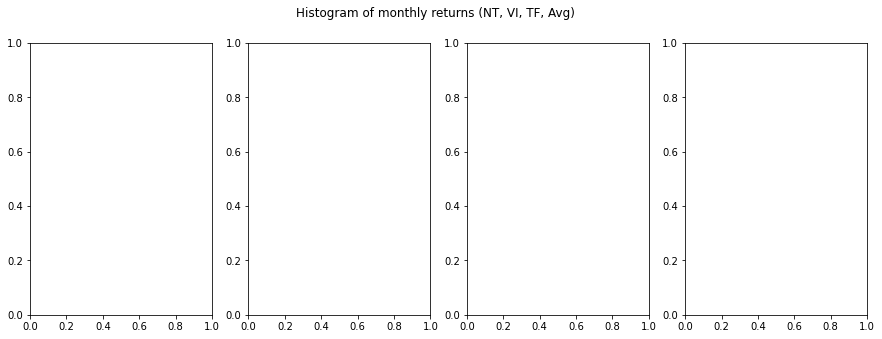

In [78]:
''' Monthly strategy returns '''


NT_monthly_returns = [np.nan] * 21
NT_daily_wealth = df['NT_nav'].to_numpy()
i = 21
while i < len(NT_daily_wealth):
    try:
        NT_monthly_returns.append(NT_daily_wealth[i] / NT_daily_wealth[i-21])
    except:
        NT_monthly_returns.append(0)
    i += 1

VI_monthly_returns = [np.nan] * 21
VI_daily_wealth = df['VI_nav'].to_numpy()
i = 21
while i < len(VI_daily_wealth):
    try:
        VI_monthly_returns.append(VI_daily_wealth[i] / VI_daily_wealth[i-21])
    except:
        VI_monthly_returns.append(0)
    i += 1

TF_monthly_returns = [np.nan] * 21
TF_daily_wealth = df['TF_nav'].to_numpy()
i = 21
while i < len(TF_daily_wealth):
    try:
        TF_monthly_returns.append(TF_daily_wealth[i] / TF_daily_wealth[i-21])
    except: 
        TF_monthly_returns.append(0)
    i += 1


AvgMonthlyReturn = []
for i in range(len(VI_monthly_returns)):
    AvgMonthlyReturn.append((TF_monthly_returns[i] + NT_monthly_returns[i] + VI_monthly_returns[i]) / 3)

df['MonthlyReturn'] = AvgMonthlyReturn
df['NT_MonthlyReturn'] = NT_monthly_returns
df['VI_MonthlyReturn'] = VI_monthly_returns
df['TF_MonthlyReturn'] = TF_monthly_returns

print(np.mean(df['MonthlyReturn'])) # Daily


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of monthly returns (NT, VI, TF, Avg)')
ax1.hist(df['NT_MonthlyReturn'], bins = 20)
ax2.hist(df['VI_MonthlyReturn'], bins = 20)
ax3.hist(df['TF_MonthlyReturn'], bins = 20)
ax4.hist(df['MonthlyReturn'], bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Returns')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of log monthly returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_MonthlyReturn']), bins = 20)
ax2.hist(np.log(df['VI_MonthlyReturn']), bins = 20)
ax3.hist(np.log(df['TF_MonthlyReturn']), bins = 20)
ax4.hist(np.log(df['MonthlyReturn']), bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Log Returns')
plt.show()

Bin

In [ ]:




# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 5), sharex = True)
# fig.suptitle('Price, Positive positions, negative positions')
# ax1.plot(df["Price"])
# ax2.plot(df["Pos+"])
# ax3.plot(df["Pos-"])
# ax1.set_xlabel('Time (days)')
# plt.show()



# df['NT_returns_ema'] = df['NT_returns'].ewm(span = 252).mean()
# df['VI_returns_ema'] = df['VI_returns'].ewm(span = 252).mean()
# df['TF_returns_ema'] = df['TF_returns'].ewm(span = 252).mean()

# df.plot(x="Gen", y = ["NT_returns_ema", "VI_returns_ema", "TF_returns_ema"],
#         kind="line", figsize=(15, 6), ylim=[-0.01,0.01])
# plt.show()




# df['WShare_NT_mag'] = abs(np.diff(df['WShare_NT'], prepend = 0))
# df['WShare_VI_mag'] = abs(np.diff(df['WShare_VI'], prepend = 0))
# df['WShare_TF_mag'] = abs(np.diff(df['WShare_TF'], prepend = 0))
# df['Sum_rel_mag'] = df['WShare_NT_mag'] + df['WShare_VI_mag'] + df['WShare_TF_mag']


# df.plot(x="Gen", y = ['Sum_rel_mag'],
#         kind="line", figsize=(15, 6), ylim = [0, 20], ylabel = 'Absolute sum of changes in relative wealth')
# plt.show()


# df['WShare_NT_mag_sq'] = np.square(np.diff(df['WShare_NT'], prepend = 0))
# df['WShare_VI_mag_sq'] = np.square(np.diff(df['WShare_VI'], prepend = 0))
# df['WShare_TF_mag_sq'] = np.square(np.diff(df['WShare_TF'], prepend = 0))
# df['Sum_rel_mag_sq'] = df['WShare_NT_mag_sq'] + df['WShare_VI_mag_sq'] + df['WShare_TF_mag_sq']
# df['Sum_rel_mag_sq_ema'] = df["Sum_rel_mag_sq"].ewm(span = 252).mean()


# df.plot(x="Gen", y = ['Sum_rel_mag_sq', 'Sum_rel_mag_sq_ema'],
#         kind="line", figsize=(15, 6), ylim = [0, 20], 
#         ylabel = 'Squared sum of changes in relative wealth', 
#         title='Squared sum of changes in relative wealth over time')
# plt.show()

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 5), sharex = True)
# fig.suptitle('Strategy wealth share and magnitude of changes')
# ax1.plot(df["WShare_TF"], label = 'Wealth share TF')
# ax1.plot(df["WShare_VI"], label = 'Wealth share VI')
# ax1.plot(df["WShare_NT"], label = 'Wealth share NT')
# ax2.plot(df["Sum_rel_mag_sq"], label = 'Variability')
# ax2.plot(df["Sum_rel_mag_sq_ema"], label = 'Variability (EMA)')
# ax1.legend()
# ax2.legend()
# ax2.set_ylim(0,15)
# ax2.set_xlabel('Time (days)')
# ax1.set_title('Wealth shares of strategies')
# ax2.set_title('Squared sum of wealths share changes')
# plt.show()